# Whirlwind tour of the nelpy object model
`WhirlwindTour.ipynb`

## Overview

In [ ]:
EpochArray (time)
AnalogSignalArray (time)
PositionArray (time)
SpikeTrainArray (time)
BinnedSpikeTrainArray (time)
EventArray (time)
ValueEventArray (time)
StatefulEventArray (time)
WrappedPositionArray (time) [wrapy] [RinglikeTrajectory?]

In [42]:
import numpy as np
import nelpy as nel

## EpochArray

The `EpochArray` is arguably _the_ most fundamental data object in nelpy. It contains a collection of intervals, and more specifically _temporal_ intervals, hence the name `EpochArray`. All the core temporal nelpy objects (including the `EpochArray` itself) have underlying `EpochArray`s, specifying where (in time) those objects are defined. Usually, this attribute is referred to as the object's _support_ (similar to a mathematical function's support, but specifying where the function is defined, rather than where it is nonzero).

All intervals are half-open intervals of the form $[a, b)$, and a list of these can be accessed through the `.time` attribute.

Here are a few simple examples:

```python
ep = nel.EpochArray(0, 5)                       # EpochArray with a single epoch
ep = nel.EpochArray([[0, 5], [5, 15]])          # EpochArray with multiple non-overlapping epochs
ep = nel.EpochArray([[0, 5], [2, 7], [4, 10]])  # EpochArray with multiple, overlapping epochs
ep = nel.EpochArray([0, 2, 5, 10], duration=2)  # EpochArray with four epochs, each of duration 2 seconds
```

## AnalogSignalArray

The `AnalogSignalArray` is used to store fairly-regularly-sampled temporal signals. Ideally the signals should be sampled regularly, but many of the methods handle irregularly sampled data gracefully, and moreover, the `AnalogSignalArray` makes it easy to sanitize an irregularly sampled signal into an easier-to-work-with regularly sampled signal.

Fundamentally, an `AnalogSignalArray` contains a `.time` attribute, and a `.data` attribute, corresponding to the (n,) sample timestamps, in seconds, and the (m, n) signal values (n samples for each of m signals).

```python
# create an AnalogSignalArray with a single signal, with four samples:
asa = nel.AnalogSignalArray(data=[2, 4, 5, 6])

# create an AnalogSignalArray with a single signal, with four samples:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3],
                            data=[2, 4, 5, 6])

# create an AnalogSignalArray with two signals, each with four samples:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3],
                            data=[[2, 4, 5, 6], [5, 4, 3, 2]])

# create an AnalogSignalArray with a single signal, with four samples:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3],
                            data=[2, 4, 5, 6])

# create an AnalogSignalArray with a single signal, with four samples, 
# and an explicit support:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3],
                            data=[2, 4, 5, 6],
                            support=nel.EpochArray(0,4))

# create an AnalogSignalArray with a single signal, with four samples, 
# and an explicit sampling rate:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3],
                            data=[2, 4, 5, 6],
                            fs=1)

# create an AnalogSignalArray with a single signal, with ten samples:
asa = nel.AnalogSignalArray(timestamps=[0, 1, 2, 3, 10, 11, 12, 13, 14, 15],
                            data=[1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

# npl.plot(asa, marker='.')
```

In [41]:
# PositionArray
xcoords = [0, 1, 2, 3, 4]
ycoords = [2, 3, 3, 2, 3]
pos = nel.PositionArray([xcoords, ycoords])  # same syntax as AnalogSignalArray
# print(pos.data)
# print(pos.x)
# print(pos.y)

# SpikeTrainArray
# BinnedSpikeTrainArray
# EventArray
# ValueEventArray
# StatefulEventArray
# WrappedPositionArray [RinglikeTrajectory?]
# TuningCurve1D
# TuningCurve2D

d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:396: UserWarning: creating support from time and sampling rate, fs!
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:227: UserWarning: fs was not specified, so we try to estimate it from the data...
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:229: UserWarning: fs was estimated to be 1.0 Hz


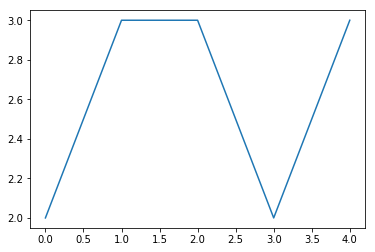

In [37]:
npl.plot2d(pos)

TuningCurve1D (supports wrapping in smoothing already)
TuningCurve2D (supports wrapping in smoothing already)

In [ ]:
PoissonHMM

In [ ]:
IMUSensorArray

In [ ]:
IntervalArray

PDF
StackedSmoothing (non-time, and time)
WrappedSmoothing (non-time, and time)
IrregularAnalogSignalArray

wrapx --> TuningCurve1D
wrapy --> WrappedPositionArray (time), treadmill, wheel
wrapxy --> TuningCurve2D for spherical environment
